In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from IPython.core.display import display, HTML
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('./Training and Testing Sets/UNSW_NB15_training-set.csv')

In [3]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [4]:
label_1_data = df[df['label'] == 1]

current_count = label_1_data.shape[0]
if current_count > 1000:
    num_to_drop = current_count - 1000
    half_label_1_data = label_1_data.sample(n=num_to_drop, random_state=42)
    df = df.drop(half_label_1_data.index).reset_index(drop=True)

label_counts = df['label'].value_counts()
print(label_counts)

label
0    56000
1     1000
Name: count, dtype: int64


In [5]:
label_0_data = df[df['label'] == 0]

current_count = label_0_data.shape[0]
if current_count > 1000:
    num_to_drop = current_count - 1000
    half_label_0_data = label_0_data.sample(n=num_to_drop, random_state=42)
    df = df.drop(half_label_0_data.index).reset_index(drop=True)

label_counts = df['label'].value_counts()
print(label_counts)

label
0    1000
1    1000
Name: count, dtype: int64


In [6]:
list_drop = ['id','attack_cat']

df.drop(list_drop,axis=1,inplace=True)

# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,2000.000000,2000.000000,2000.00000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2.000000e+03,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.289911,21.338000,20.03300,6.987147e+03,1.397139e+04,7.522034e+04,152.479000,73.552500,6.022267e+07,1.043980e+06,...,4.456500,3.430500,7.490000,0.015000,0.015000,0.105000,6.305500,8.263000,0.026000,0.500000
std,6.199271,95.930209,66.94316,1.196360e+05,8.326755e+04,1.501954e+05,110.038065,103.863738,1.810547e+08,2.973828e+06,...,7.212289,5.245944,10.017688,0.121583,0.121583,0.402562,7.546167,9.827977,0.159175,0.500125
min,0.000000,1.000000,0.00000,4.600000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000009,2.000000,0.00000,1.460000e+02,0.000000e+00,3.197779e+01,31.000000,0.000000,1.257095e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.013794,7.000000,4.00000,5.640000e+02,2.680000e+02,2.739726e+03,254.000000,29.000000,5.692013e+05,3.595744e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.500000
75%,0.610011,16.000000,16.50000,1.684000e+03,1.728000e+03,1.111111e+05,254.000000,108.000000,5.700000e+07,3.935895e+05,...,3.000000,2.000000,7.000000,0.000000,0.000000,0.000000,7.250000,10.000000,0.000000,1.000000
max,59.995983,3844.000000,858.00000,5.226546e+06,1.094788e+06,1.000000e+06,254.000000,252.000000,4.256000e+09,1.828023e+07,...,50.000000,46.000000,63.000000,1.000000,1.000000,9.000000,50.000000,62.000000,1.000000,1.000000


In [7]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.438684,14.850000,12.875000,1889.84750,5277.708000,64137.008334,152.479000,73.552500,4.303689e+07,8.308862e+05,...,3.889000,3.376000,7.263500,0.015000,0.015000,0.105000,5.833000,8.042000,0.026000,0.500000
std,0.773970,19.533312,19.956265,3313.40075,12680.985181,102604.804494,110.038065,103.863738,7.455616e+07,2.104489e+06,...,5.313737,5.035504,9.300124,0.121583,0.121583,0.402562,6.050985,9.133726,0.159175,0.500125
min,0.000000,1.000000,0.000000,46.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000009,2.000000,0.000000,146.00000,0.000000,31.977790,31.000000,0.000000,1.257095e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.013794,7.000000,4.000000,564.00000,268.000000,2739.726138,254.000000,29.000000,5.692013e+05,3.595744e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.500000
75%,0.610011,16.000000,16.500000,1684.00000,1728.000000,111111.107200,254.000000,108.000000,5.700000e+07,3.935895e+05,...,3.000000,2.000000,7.000000,0.000000,0.000000,0.000000,7.250000,10.000000,0.000000,1.000000
max,2.930692,68.000000,70.000000,13350.00000,48720.400000,333333.321500,254.000000,252.000000,2.666667e+08,8.401608e+06,...,17.000000,17.000000,32.000000,1.000000,1.000000,9.000000,21.000000,32.000000,1.000000,1.000000


In [8]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,2000,2000,2000
unique,85,9,5
top,tcp,-,FIN
freq,1017,1127,979


In [9]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,2000,2000,2000
unique,6,5,5
top,tcp,-,FIN
freq,1017,1197,979


In [10]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.head()
feature_names = list(X.columns)
np.shape(X)

(2000, 42)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
np.shape(X)

for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)  # Standardizing the features

# Initialize performance metrics
accuracies_nb, detection_rates_nb, false_alarm_rates_nb = [], [], []
accuracies_nb2, detection_rates_nb2, false_alarm_rates_nb2 = [], [], []
accuracies_single, detection_rates_single, false_alarm_rates_single = [], [], []

# 10-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Split data into S1 and S2
    X_S1, X_S2, y_S1, y_S2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

    # Naive Bayes transformers estimation
    n_features = X.shape[1]
    nb_transformers = []

    for j in range(n_features):
        X_S1_j = X_S1[:, j].reshape(-1, 1)

        # Calculate prior probability π
        n1 = np.sum(y_S1 == 1)
        n0 = np.sum(y_S1 == 0)
        pi_hat = n1 / (n1 + n0)

        # Estimate conditional probability densities
        bandwidth = 0.6
        kde_class1 = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_S1_j[y_S1 == 1])
        kde_class0 = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_S1_j[y_S1 == 0])

        # Save transformers
        nb_transformers.append((pi_hat, kde_class1, kde_class0))

    # Transform data
    X_S2_transformed = np.zeros_like(X_S2)
    for j in range(n_features):
        pi_hat, kde_class1, kde_class0 = nb_transformers[j]
        X_S2_j = X_S2[:, j].reshape(-1, 1)

        log_density_class1 = kde_class1.score_samples(X_S2_j)
        log_density_class0 = kde_class0.score_samples(X_S2_j)
        transformed_feature = np.log(pi_hat) + log_density_class1 - np.log(1 - pi_hat) - log_density_class0

        X_S2_transformed[:, j] = transformed_feature

    # Train SVM models
    svm_model_nb = SVC(kernel='rbf', C=50000.0, gamma='auto')
    svm_model_nb.fit(X_S2_transformed, y_S2)

    X_S2_combined = np.hstack((X_S2_transformed, X_S2))
    svm_model_nb2 = SVC(kernel='rbf', C=50000.0, gamma='auto')
    svm_model_nb2.fit(X_S2_combined, y_S2)

    svm_model_single = SVC()
    svm_model_single.fit(X_train, y_train)

    # Evaluate on the test set
    X_test_transformed = np.zeros_like(X_test)
    for j in range(n_features):
        pi_hat, kde_class1, kde_class0 = nb_transformers[j]
        X_test_j = X_test[:, j].reshape(-1, 1)
        log_density_class1 = kde_class1.score_samples(X_test_j)
        log_density_class0 = kde_class0.score_samples(X_test_j)
        transformed_feature = np.log(pi_hat) + log_density_class1 - np.log(1 - pi_hat) - log_density_class0
        X_test_transformed[:, j] = transformed_feature

    # Predictions
    y_pred_nb = svm_model_nb.predict(X_test_transformed)
    X_test_combined = np.hstack((X_test_transformed, X_test))
    y_pred_nb2 = svm_model_nb2.predict(X_test_combined)
    y_pred_single = svm_model_single.predict(X_test)

    # Confusion matrices
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    cm_nb2 = confusion_matrix(y_test, y_pred_nb2)
    cm_single = confusion_matrix(y_test, y_pred_single)

    # Performance metrics
    tp_nb, fn_nb, fp_nb, tn_nb = cm_nb.ravel()
    tp_nb2, fn_nb2, fp_nb2, tn_nb2 = cm_nb2.ravel()
    tp_single, fn_single, fp_single, tn_single = cm_single.ravel()

    accuracy_nb = (tp_nb + tn_nb) / (tp_nb + fn_nb + fp_nb + tn_nb)
    accuracy_nb2 = (tp_nb2 + tn_nb2) / (tp_nb2 + fn_nb2 + fp_nb2 + tn_nb2)
    accuracy_single = (tp_single + tn_single) / (tp_single + fn_single + fp_single + tn_single)

    detection_rate_nb = tp_nb / (tp_nb + fn_nb)
    detection_rate_nb2 = tp_nb2 / (tp_nb2 + fn_nb2)
    detection_rate_single = tp_single / (tp_single + fn_single)

    false_alarm_rate_nb = fp_nb / (fp_nb + tn_nb)
    false_alarm_rate_nb2 = fp_nb2 / (fp_nb2 + tn_nb2)
    false_alarm_rate_single = fp_single / (fp_single + tn_single)

    # Save performance metrics
    accuracies_nb.append(accuracy_nb)
    accuracies_nb2.append(accuracy_nb2)
    accuracies_single.append(accuracy_single)

    detection_rates_nb.append(detection_rate_nb)
    detection_rates_nb2.append(detection_rate_nb2)
    detection_rates_single.append(detection_rate_single)

    false_alarm_rates_nb.append(false_alarm_rate_nb)
    false_alarm_rates_nb2.append(false_alarm_rate_nb2)
    false_alarm_rates_single.append(false_alarm_rate_single)

# Plot boxplots
def plot_boxplot(metrics_nb, metrics_nb2, metrics_single, metric_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot([metrics_nb, metrics_nb2, metrics_single], labels=['NB-SVM', 'NB-SVM2', 'Single-SVM'])
    plt.title(f'Distribution of {metric_name} across 10 folds')
    plt.ylabel(metric_name)
    plt.show()

plot_boxplot(accuracies_nb, accuracies_nb2, accuracies_single, 'Accuracy')
plot_boxplot(detection_rates_nb, detection_rates_nb2, detection_rates_single, 'Detection Rate')
plot_boxplot(false_alarm_rates_nb, false_alarm_rates_nb2, false_alarm_rates_single, 'False Alarm Rate')

# Output average performance metrics
print("\nAverage Performance Metrics:")
print("NB-SVM Performance:")
print(f'Average Accuracy: {np.mean(accuracies_nb)}')
print(f'Average Detection Rate: {np.mean(detection_rates_nb)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_nb)}')

print("\nNB-SVM2 Performance:")
print(f'Average Accuracy: {np.mean(accuracies_nb2)}')
print(f'Average Detection Rate: {np.mean(detection_rates_nb2)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_nb2)}')

print("\nSingle-SVM Performance:")
print(f'Average Accuracy: {np.mean(accuracies_single)}')
print(f'Average Detection Rate: {np.mean(detection_rates_single)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_single)}')

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)  # Standardizing the features

# Initialize performance metrics
accuracies_nb, detection_rates_nb, false_alarm_rates_nb = [], [], []
accuracies_nb2, detection_rates_nb2, false_alarm_rates_nb2 = [], [], []
accuracies_single, detection_rates_single, false_alarm_rates_single = [], [], []

# 10-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Split data into S1 and S2
    X_S1, X_S2, y_S1, y_S2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

    # Naive Bayes transformers estimation
    n_features = X.shape[1]
    nb_transformers = []

    for j in range(n_features):
        X_S1_j = X_S1[:, j].reshape(-1, 1)

        # Calculate prior probability π
        n1 = np.sum(y_S1 == 1)
        n0 = np.sum(y_S1 == 0)
        pi_hat = n1 / (n1 + n0)

        # Estimate conditional probability densities
        bandwidth = 0.6
        kde_class1 = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_S1_j[y_S1 == 1])
        kde_class0 = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_S1_j[y_S1 == 0])

        # Save transformers
        nb_transformers.append((pi_hat, kde_class1, kde_class0))

    # Transform data
    X_S2_transformed = np.zeros_like(X_S2)
    for j in range(n_features):
        pi_hat, kde_class1, kde_class0 = nb_transformers[j]
        X_S2_j = X_S2[:, j].reshape(-1, 1)

        log_density_class1 = kde_class1.score_samples(X_S2_j)
        log_density_class0 = kde_class0.score_samples(X_S2_j)
        transformed_feature = np.log(pi_hat) + log_density_class1 - np.log(1 - pi_hat) - log_density_class0

        X_S2_transformed[:, j] = transformed_feature

    # Train SVM models
    svm_model_nb = SVC(kernel='rbf', C=50000.0, gamma='auto')
    svm_model_nb.fit(X_S2_transformed, y_S2)

    X_S2_combined = np.hstack((X_S2_transformed, X_S2))
    svm_model_nb2 = SVC(kernel='rbf', C=50000.0, gamma='auto')
    svm_model_nb2.fit(X_S2_combined, y_S2)

    svm_model_single = SVC(kernel='rbf', C=50000.0, gamma='auto')
    svm_model_single.fit(X_train, y_train)

    # Evaluate on the test set
    X_test_transformed = np.zeros_like(X_test)
    for j in range(n_features):
        pi_hat, kde_class1, kde_class0 = nb_transformers[j]
        X_test_j = X_test[:, j].reshape(-1, 1)
        log_density_class1 = kde_class1.score_samples(X_test_j)
        log_density_class0 = kde_class0.score_samples(X_test_j)
        transformed_feature = np.log(pi_hat) + log_density_class1 - np.log(1 - pi_hat) - log_density_class0
        X_test_transformed[:, j] = transformed_feature

    # Predictions
    y_pred_nb = svm_model_nb.predict(X_test_transformed)
    X_test_combined = np.hstack((X_test_transformed, X_test))
    y_pred_nb2 = svm_model_nb2.predict(X_test_combined)
    y_pred_single = svm_model_single.predict(X_test)

    # Confusion matrices
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    cm_nb2 = confusion_matrix(y_test, y_pred_nb2)
    cm_single = confusion_matrix(y_test, y_pred_single)

    # Performance metrics
    tp_nb, fn_nb, fp_nb, tn_nb = cm_nb.ravel()
    tp_nb2, fn_nb2, fp_nb2, tn_nb2 = cm_nb2.ravel()
    tp_single, fn_single, fp_single, tn_single = cm_single.ravel()

    accuracy_nb = (tp_nb + tn_nb) / (tp_nb + fn_nb + fp_nb + tn_nb)
    accuracy_nb2 = (tp_nb2 + tn_nb2) / (tp_nb2 + fn_nb2 + fp_nb2 + tn_nb2)
    accuracy_single = (tp_single + tn_single) / (tp_single + fn_single + fp_single + tn_single)

    detection_rate_nb = tp_nb / (tp_nb + fn_nb)
    detection_rate_nb2 = tp_nb2 / (tp_nb2 + fn_nb2)
    detection_rate_single = tp_single / (tp_single + fn_single)

    false_alarm_rate_nb = fp_nb / (fp_nb + tn_nb)
    false_alarm_rate_nb2 = fp_nb2 / (fp_nb2 + tn_nb2)
    false_alarm_rate_single = fp_single / (fp_single + tn_single)

    # Save performance metrics
    accuracies_nb.append(accuracy_nb)
    accuracies_nb2.append(accuracy_nb2)
    accuracies_single.append(accuracy_single)

    detection_rates_nb.append(detection_rate_nb)
    detection_rates_nb2.append(detection_rate_nb2)
    detection_rates_single.append(detection_rate_single)

    false_alarm_rates_nb.append(false_alarm_rate_nb)
    false_alarm_rates_nb2.append(false_alarm_rate_nb2)
    false_alarm_rates_single.append(false_alarm_rate_single)

# Plot boxplots
def plot_boxplot(metrics_nb, metrics_nb2, metrics_single, metric_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot([metrics_nb, metrics_nb2, metrics_single], labels=['NB-SVM', 'NB-SVM2', 'Single-SVM'])
    plt.title(f'Distribution of {metric_name} across 10 folds')
    plt.ylabel(metric_name)
    plt.show()

plot_boxplot(accuracies_nb, accuracies_nb2, accuracies_single, 'Accuracy')
plot_boxplot(detection_rates_nb, detection_rates_nb2, detection_rates_single, 'Detection Rate')
plot_boxplot(false_alarm_rates_nb, false_alarm_rates_nb2, false_alarm_rates_single, 'False Alarm Rate')

# Output average performance metrics
print("\nAverage Performance Metrics:")
print("NB-SVM Performance:")
print(f'Average Accuracy: {np.mean(accuracies_nb)}')
print(f'Average Detection Rate: {np.mean(detection_rates_nb)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_nb)}')

print("\nNB-SVM2 Performance:")
print(f'Average Accuracy: {np.mean(accuracies_nb2)}')
print(f'Average Detection Rate: {np.mean(detection_rates_nb2)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_nb2)}')

print("\nSingle-SVM Performance:")
print(f'Average Accuracy: {np.mean(accuracies_single)}')
print(f'Average Detection Rate: {np.mean(detection_rates_single)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_single)}')

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


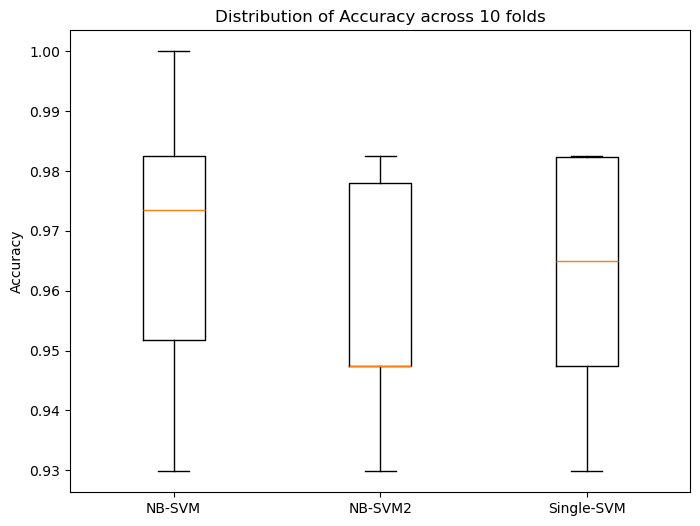

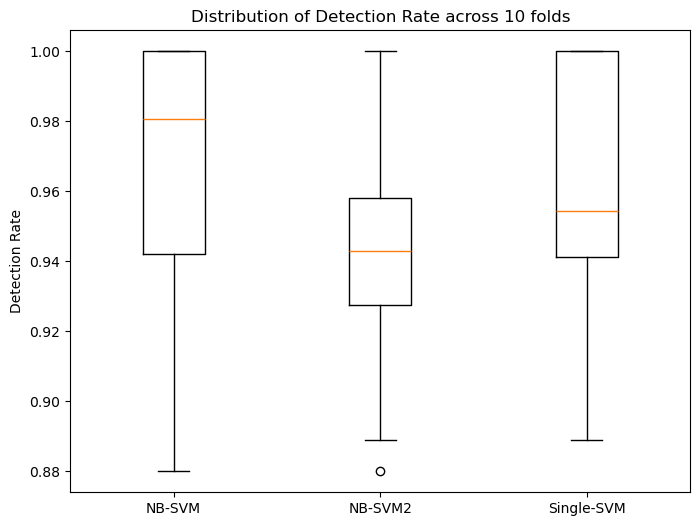

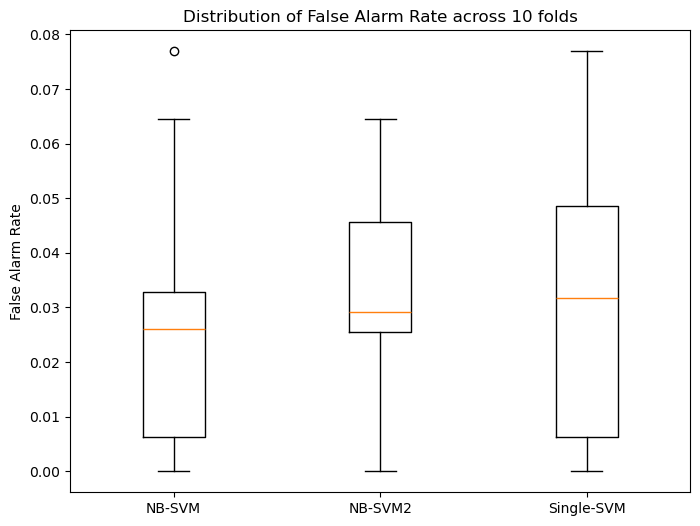


Average Performance Metrics:
NB-SVM Performance:
Average Accuracy: 0.9683897243107771
Average Detection Rate: 0.9653085302497069
Average False Alarm Rate: 0.028304956631569532

NB-SVM2 Performance:
Average Accuracy: 0.9578320802005011
Average Detection Rate: 0.9427670080177821
Average False Alarm Rate: 0.030836029888449246

Single-SVM Performance:
Average Accuracy: 0.96312656641604
Average Detection Rate: 0.9600148712656453
Average False Alarm Rate: 0.032674326000938905


In [6]:
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)  # Standardizing the features

# Initialize performance metrics
accuracies_nb, detection_rates_nb, false_alarm_rates_nb = [], [], []
accuracies_nb2, detection_rates_nb2, false_alarm_rates_nb2 = [], [], []
accuracies_single, detection_rates_single, false_alarm_rates_single = [], [], []

# 10-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Split data into S1 and S2
    X_S1, X_S2, y_S1, y_S2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

    # Naive Bayes transformers estimation
    n_features = X.shape[1]
    nb_transformers = []

    for j in range(n_features):
        X_S1_j = X_S1[:, j].reshape(-1, 1)

        # Calculate prior probability π
        n1 = np.sum(y_S1 == 1)
        n0 = np.sum(y_S1 == 0)
        pi_hat = n1 / (n1 + n0)

        # Estimate conditional probability densities
        bandwidth = 0.6
        kde_class1 = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_S1_j[y_S1 == 1])
        kde_class0 = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_S1_j[y_S1 == 0])

        # Save transformers
        nb_transformers.append((pi_hat, kde_class1, kde_class0))

    # Transform data
    X_S2_transformed = np.zeros_like(X_S2)
    for j in range(n_features):
        pi_hat, kde_class1, kde_class0 = nb_transformers[j]
        X_S2_j = X_S2[:, j].reshape(-1, 1)

        log_density_class1 = kde_class1.score_samples(X_S2_j)
        log_density_class0 = kde_class0.score_samples(X_S2_j)
        transformed_feature = np.log(pi_hat) + log_density_class1 - np.log(1 - pi_hat) - log_density_class0

        X_S2_transformed[:, j] = transformed_feature

    # Train SVM models
    svm_model_nb = SVC(kernel='rbf', C=50000.0, gamma='auto')
    svm_model_nb.fit(X_S2_transformed, y_S2)

    X_S2_combined = np.hstack((X_S2_transformed, X_S2))
    svm_model_nb2 = SVC(kernel='rbf', C=500000.0, gamma='auto')
    svm_model_nb2.fit(X_S2_combined, y_S2)

    svm_model_single = SVC(kernel='rbf', C=50000.0, gamma='auto')
    svm_model_single.fit(X_train, y_train)

    # Evaluate on the test set
    X_test_transformed = np.zeros_like(X_test)
    for j in range(n_features):
        pi_hat, kde_class1, kde_class0 = nb_transformers[j]
        X_test_j = X_test[:, j].reshape(-1, 1)
        log_density_class1 = kde_class1.score_samples(X_test_j)
        log_density_class0 = kde_class0.score_samples(X_test_j)
        transformed_feature = np.log(pi_hat) + log_density_class1 - np.log(1 - pi_hat) - log_density_class0
        X_test_transformed[:, j] = transformed_feature

    # Predictions
    y_pred_nb = svm_model_nb.predict(X_test_transformed)
    X_test_combined = np.hstack((X_test_transformed, X_test))
    y_pred_nb2 = svm_model_nb2.predict(X_test_combined)
    y_pred_single = svm_model_single.predict(X_test)

    # Confusion matrices
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    cm_nb2 = confusion_matrix(y_test, y_pred_nb2)
    cm_single = confusion_matrix(y_test, y_pred_single)

    # Performance metrics
    tp_nb, fn_nb, fp_nb, tn_nb = cm_nb.ravel()
    tp_nb2, fn_nb2, fp_nb2, tn_nb2 = cm_nb2.ravel()
    tp_single, fn_single, fp_single, tn_single = cm_single.ravel()

    accuracy_nb = (tp_nb + tn_nb) / (tp_nb + fn_nb + fp_nb + tn_nb)
    accuracy_nb2 = (tp_nb2 + tn_nb2) / (tp_nb2 + fn_nb2 + fp_nb2 + tn_nb2)
    accuracy_single = (tp_single + tn_single) / (tp_single + fn_single + fp_single + tn_single)

    detection_rate_nb = tp_nb / (tp_nb + fn_nb)
    detection_rate_nb2 = tp_nb2 / (tp_nb2 + fn_nb2)
    detection_rate_single = tp_single / (tp_single + fn_single)

    false_alarm_rate_nb = fp_nb / (fp_nb + tn_nb)
    false_alarm_rate_nb2 = fp_nb2 / (fp_nb2 + tn_nb2)
    false_alarm_rate_single = fp_single / (fp_single + tn_single)

    # Save performance metrics
    accuracies_nb.append(accuracy_nb)
    accuracies_nb2.append(accuracy_nb2)
    accuracies_single.append(accuracy_single)

    detection_rates_nb.append(detection_rate_nb)
    detection_rates_nb2.append(detection_rate_nb2)
    detection_rates_single.append(detection_rate_single)

    false_alarm_rates_nb.append(false_alarm_rate_nb)
    false_alarm_rates_nb2.append(false_alarm_rate_nb2)
    false_alarm_rates_single.append(false_alarm_rate_single)

# Plot boxplots
def plot_boxplot(metrics_nb, metrics_nb2, metrics_single, metric_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot([metrics_nb, metrics_nb2, metrics_single], labels=['NB-SVM', 'NB-SVM2', 'Single-SVM'])
    plt.title(f'Distribution of {metric_name} across 10 folds')
    plt.ylabel(metric_name)
    plt.show()

plot_boxplot(accuracies_nb, accuracies_nb2, accuracies_single, 'Accuracy')
plot_boxplot(detection_rates_nb, detection_rates_nb2, detection_rates_single, 'Detection Rate')
plot_boxplot(false_alarm_rates_nb, false_alarm_rates_nb2, false_alarm_rates_single, 'False Alarm Rate')

# Output average performance metrics
print("\nAverage Performance Metrics:")
print("NB-SVM Performance:")
print(f'Average Accuracy: {np.mean(accuracies_nb)}')
print(f'Average Detection Rate: {np.mean(detection_rates_nb)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_nb)}')

print("\nNB-SVM2 Performance:")
print(f'Average Accuracy: {np.mean(accuracies_nb2)}')
print(f'Average Detection Rate: {np.mean(detection_rates_nb2)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_nb2)}')

print("\nSingle-SVM Performance:")
print(f'Average Accuracy: {np.mean(accuracies_single)}')
print(f'Average Detection Rate: {np.mean(detection_rates_single)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_single)}')

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


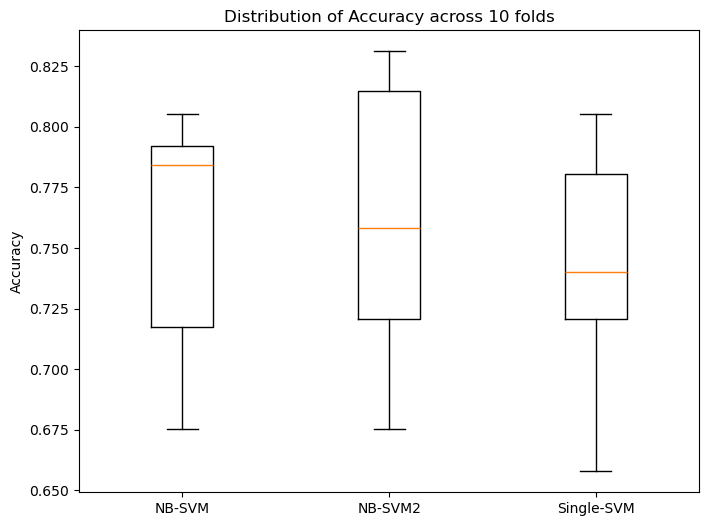

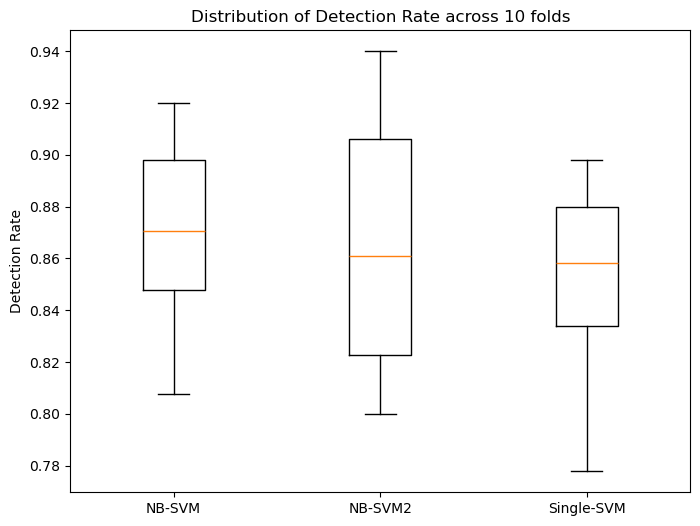

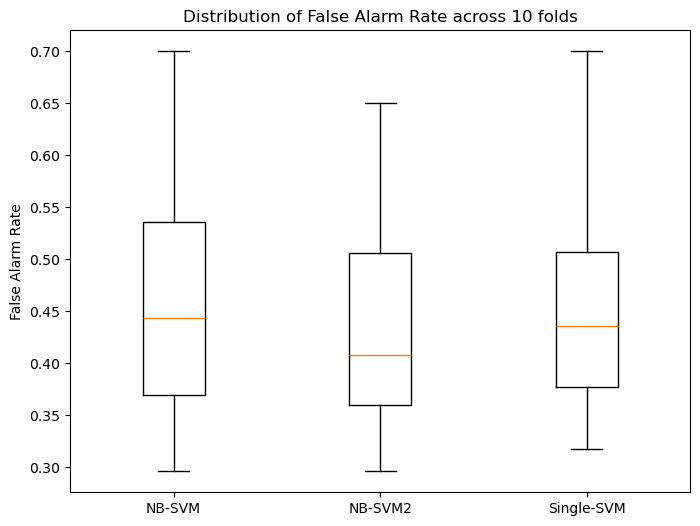


Average Performance Metrics:
NB-SVM Performance:
Average Accuracy: 0.7564593301435407
Average Detection Rate: 0.871511823180996
Average False Alarm Rate: 0.4629541497928595

NB-SVM2 Performance:
Average Accuracy: 0.7616199589883801
Average Detection Rate: 0.8649663686355415
Average False Alarm Rate: 0.43587312448602766

Single-SVM Performance:
Average Accuracy: 0.7447368421052631
Average Detection Rate: 0.8518320292906758
Average False Alarm Rate: 0.45604532265822584


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Split the dataset into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)  # Standardizing the features

# Initialize performance metrics
accuracies_nb, detection_rates_nb, false_alarm_rates_nb = [], [], []
accuracies_nb2, detection_rates_nb2, false_alarm_rates_nb2 = [], [], []
accuracies_single, detection_rates_single, false_alarm_rates_single = [], [], []

# 10-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Split data into S1 and S2
    X_S1, X_S2, y_S1, y_S2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

    # Naive Bayes transformers estimation
    n_features = X.shape[1]
    nb_transformers = []

    for j in range(n_features):
        X_S1_j = X_S1[:, j].reshape(-1, 1)

        # Calculate prior probability π
        n1 = np.sum(y_S1 == 1)
        n0 = np.sum(y_S1 == 0)
        pi_hat = n1 / (n1 + n0)

        # Estimate conditional probability densities
        bandwidth = 0.6
        kde_class1 = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_S1_j[y_S1 == 1])
        kde_class0 = KernelDensity(bandwidth=bandwidth, kernel='gaussian').fit(X_S1_j[y_S1 == 0])

        # Save transformers
        nb_transformers.append((pi_hat, kde_class1, kde_class0))

    # Transform data
    X_S2_transformed = np.zeros_like(X_S2)
    for j in range(n_features):
        pi_hat, kde_class1, kde_class0 = nb_transformers[j]
        X_S2_j = X_S2[:, j].reshape(-1, 1)

        log_density_class1 = kde_class1.score_samples(X_S2_j)
        log_density_class0 = kde_class0.score_samples(X_S2_j)
        transformed_feature = np.log(pi_hat) + log_density_class1 - np.log(1 - pi_hat) - log_density_class0

        X_S2_transformed[:, j] = transformed_feature

    # Train SVM models
    svm_model_nb = SVC(kernel='rbf', C=50000.0, gamma='auto')
    svm_model_nb.fit(X_S2_transformed, y_S2)

    X_S2_combined = np.hstack((X_S2_transformed, X_S2))
    svm_model_nb2 = SVC(kernel='linear', C=500000.0, gamma='auto')
    svm_model_nb2.fit(X_S2_combined, y_S2)

    svm_model_single = SVC(kernel='rbf', C=50000.0, gamma='auto')
    svm_model_single.fit(X_train, y_train)

    # Evaluate on the test set
    X_test_transformed = np.zeros_like(X_test)
    for j in range(n_features):
        pi_hat, kde_class1, kde_class0 = nb_transformers[j]
        X_test_j = X_test[:, j].reshape(-1, 1)
        log_density_class1 = kde_class1.score_samples(X_test_j)
        log_density_class0 = kde_class0.score_samples(X_test_j)
        transformed_feature = np.log(pi_hat) + log_density_class1 - np.log(1 - pi_hat) - log_density_class0
        X_test_transformed[:, j] = transformed_feature

    # Predictions
    y_pred_nb = svm_model_nb.predict(X_test_transformed)
    X_test_combined = np.hstack((X_test_transformed, X_test))
    y_pred_nb2 = svm_model_nb2.predict(X_test_combined)
    y_pred_single = svm_model_single.predict(X_test)

    # Confusion matrices
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    cm_nb2 = confusion_matrix(y_test, y_pred_nb2)
    cm_single = confusion_matrix(y_test, y_pred_single)

    # Performance metrics
    tp_nb, fn_nb, fp_nb, tn_nb = cm_nb.ravel()
    tp_nb2, fn_nb2, fp_nb2, tn_nb2 = cm_nb2.ravel()
    tp_single, fn_single, fp_single, tn_single = cm_single.ravel()

    accuracy_nb = (tp_nb + tn_nb) / (tp_nb + fn_nb + fp_nb + tn_nb)
    accuracy_nb2 = (tp_nb2 + tn_nb2) / (tp_nb2 + fn_nb2 + fp_nb2 + tn_nb2)
    accuracy_single = (tp_single + tn_single) / (tp_single + fn_single + fp_single + tn_single)

    detection_rate_nb = tp_nb / (tp_nb + fn_nb)
    detection_rate_nb2 = tp_nb2 / (tp_nb2 + fn_nb2)
    detection_rate_single = tp_single / (tp_single + fn_single)

    false_alarm_rate_nb = fp_nb / (fp_nb + tn_nb)
    false_alarm_rate_nb2 = fp_nb2 / (fp_nb2 + tn_nb2)
    false_alarm_rate_single = fp_single / (fp_single + tn_single)

    # Save performance metrics
    accuracies_nb.append(accuracy_nb)
    accuracies_nb2.append(accuracy_nb2)
    accuracies_single.append(accuracy_single)

    detection_rates_nb.append(detection_rate_nb)
    detection_rates_nb2.append(detection_rate_nb2)
    detection_rates_single.append(detection_rate_single)

    false_alarm_rates_nb.append(false_alarm_rate_nb)
    false_alarm_rates_nb2.append(false_alarm_rate_nb2)
    false_alarm_rates_single.append(false_alarm_rate_single)

# Plot boxplots
def plot_boxplot(metrics_nb, metrics_nb2, metrics_single, metric_name):
    plt.figure(figsize=(8, 6))
    plt.boxplot([metrics_nb, metrics_nb2, metrics_single], labels=['NB-SVM', 'NB-SVM2', 'Single-SVM'])
    plt.title(f'Distribution of {metric_name} across 10 folds')
    plt.ylabel(metric_name)
    plt.show()

plot_boxplot(accuracies_nb, accuracies_nb2, accuracies_single, 'Accuracy')
plot_boxplot(detection_rates_nb, detection_rates_nb2, detection_rates_single, 'Detection Rate')
plot_boxplot(false_alarm_rates_nb, false_alarm_rates_nb2, false_alarm_rates_single, 'False Alarm Rate')

# Output average performance metrics
print("\nAverage Performance Metrics:")
print("NB-SVM Performance:")
print(f'Average Accuracy: {np.mean(accuracies_nb)}')
print(f'Average Detection Rate: {np.mean(detection_rates_nb)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_nb)}')

print("\nNB-SVM2 Performance:")
print(f'Average Accuracy: {np.mean(accuracies_nb2)}')
print(f'Average Detection Rate: {np.mean(detection_rates_nb2)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_nb2)}')

print("\nSingle-SVM Performance:")
print(f'Average Accuracy: {np.mean(accuracies_single)}')
print(f'Average Detection Rate: {np.mean(detection_rates_single)}')
print(f'Average False Alarm Rate: {np.mean(false_alarm_rates_single)}')